In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corr = np.eye(3)
corr[1,2] = 0.9
corr[2,1] = 0.9
corr[1,0] = 0.
corr[0,1] = 0.
corr[2,0] = 0.
corr[0,2] = 0.
errs = np.array([2, 3, 4])

cov = np.zeros(shape=corr.shape)
for i in range(3) :
    for j in range(3) :
        cov[i, j] = corr[i, j] * errs[i] * errs[j]

x = np.random.multivariate_normal([10, 40, 70], cov, 100000)

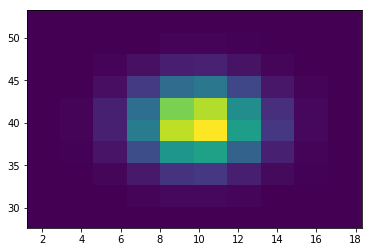

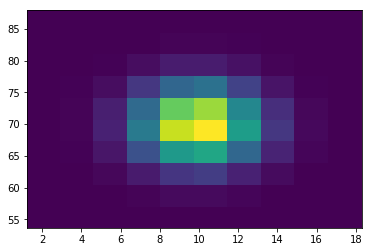

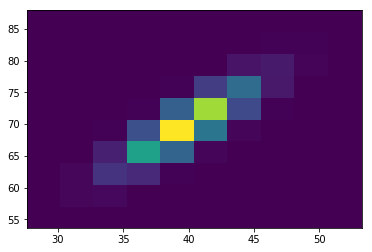

In [3]:
plt.hist2d(x[:,0], x[:,1])
plt.show()
plt.hist2d(x[:,0], x[:,2])
plt.show()
plt.hist2d(x[:,1], x[:,2])
plt.show()

In [24]:
def get_cov (x) :
    return np.cov(x.transpose())

In [40]:
def whiten (x, means=None, stds=None, eigenvectors=None, params=None) :
    x_norm = np.copy(x)
    if type(params) != type(None) :
        means = params [0]
        stds = params [1]
        eigenvectors = params [2]
    recreate_means = False
    if type(means) == type(None) :
        recreate_means = True
        means = []
    recreate_stds = False
    if type(stds) == type(None) :
        recreate_stds = True
        stds = []
    for i in range(x.shape[1]) :
        if recreate_means :
            means.append(np.mean(x_norm [:,i]))
        if recreate_stds :
            stds.append(np.std(x_norm [:,i]))
        x_mean = means[i]
        x_std  = stds [i]
        x_norm [:,i] = (x_norm [:,i] - x_mean) / x_std
    if type(eigenvectors) == type(None) :
        data_cov = get_cov(x_norm)
        eigenvalues, eigenvectors = np.linalg.eig(data_cov)
    new_data = np.array([np.matmul(eigenvectors, xp) for xp in x_norm])
    return new_data, (means, stds, eigenvectors)

In [41]:
def unwhiten (x, params) :
    (means, stds, eigenvectors) = params
    inv_eigenvectors = np.linalg.inv(eigenvectors)
    new_data = np.array([np.matmul(inv_eigenvectors, xp) for xp in x])
    for i in range(new_data.shape[1]) :
        new_data [:,i] = (stds[i]*new_data [:,i] + means[i])
    return new_data
    

In [43]:
x2, _ = whiten(x)
x3, _ = whiten(x, params=_)
x4 = unwhiten(x2, _)

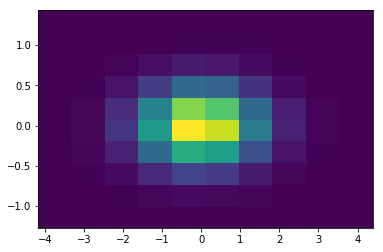

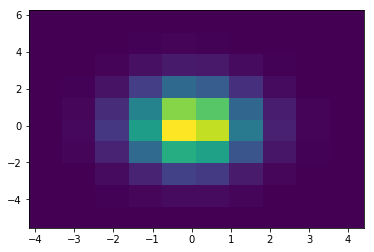

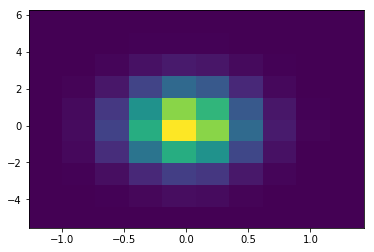

In [44]:
plt.hist2d(x2[:,0], x2[:,1])
plt.show()
plt.hist2d(x2[:,0], x2[:,2])
plt.show()
plt.hist2d(x2[:,1], x2[:,2])
plt.show()

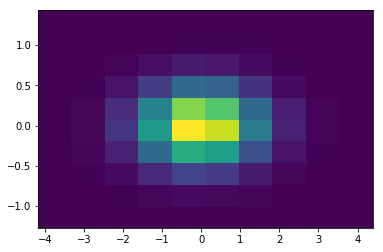

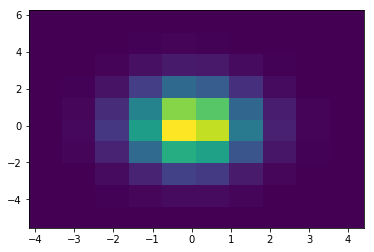

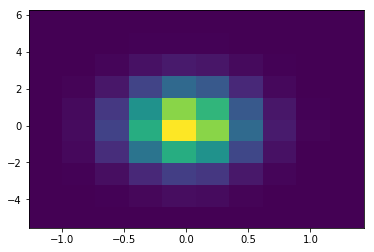

In [45]:
plt.hist2d(x3[:,0], x3[:,1])
plt.show()
plt.hist2d(x3[:,0], x3[:,2])
plt.show()
plt.hist2d(x3[:,1], x3[:,2])
plt.show()

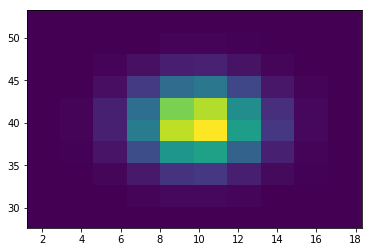

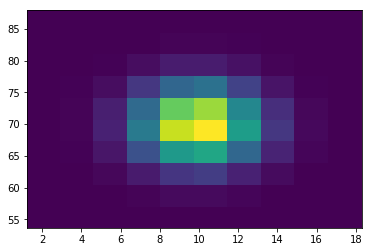

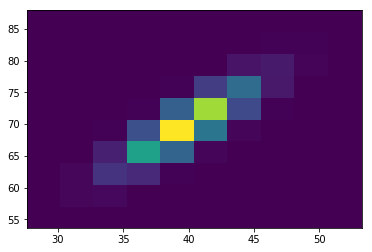

In [46]:
plt.hist2d(x4[:,0], x4[:,1])
plt.show()
plt.hist2d(x4[:,0], x4[:,2])
plt.show()
plt.hist2d(x4[:,1], x4[:,2])
plt.show()